In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bbc-news-data.csv',sep='\t')
data.head(5)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [3]:
data.shape

(2225, 4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


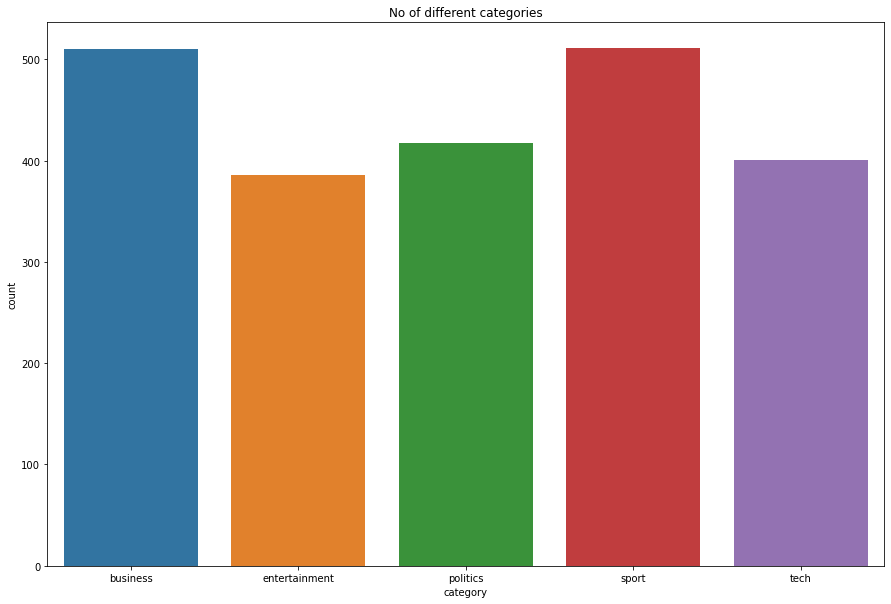

In [4]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title("No of different categories")
sns.countplot(data.category)
plt.show()

In [5]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [6]:
data.isnull().sum()

category    0
filename    0
title       0
content     0
dtype: int64

In [7]:

data = data[["title", "category"]]

x = np.array(data["title"])
y = np.array(data["category"])

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)

In [9]:
# Creating a pickle file for the CountVectorizer
import pickle
pickle.dump(cv, open('cv-transform1.pkl', 'wb'))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [12]:
# Creating a pickle file for the classifier
filename = 'newsClassification.pkl'
pickle.dump(model, open(filename, 'wb'))

In [13]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Latest Apple iPhone SE 3 concept renders show a compact smartphone in the style of the iPhone 4
['tech']


In [14]:
#model evaluation --> accuarcy score on training data
from sklearn.metrics import accuracy_score
xtrain_pred = model.predict(X_train)
print("Accuary score of training data:",accuracy_score(xtrain_pred,y_train))

Accuary score of training data: 0.9885906040268456


In [15]:
#model evaluation -->accuracy score on testing data
xtest_pred = model.predict(X_test)
print("Accuracy score on testing data:",accuracy_score(xtest_pred,y_test))

Accuracy score on testing data: 0.819047619047619
